# Mastering Applied Skills in Management, Analytics and Entrepreneurship

## DATA COLLECTION TECHNIQUES
## Part II. Load from object storage

__NOTE:__ use this notebook with `Data Science environment`.

### 1. Libraries and credentials

[About boto3](https://boto3.amazonaws.com/v1/documentation/api/latest/index.html) library.

In [1]:
# not necessary
!pip install -U pandas
!pip install -U fsspec

In [3]:
import os
import sys
import json
import boto3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [4]:
def access_data(file_path):
    """
    Reads JSON data from file.
    JSON data is a dictionary
    in Python.

    Keyword agruments:
      file_path: path to a file with JSON data

    """
    with open(file_path) as file:
        access_data = json.load(file)
    return access_data


creds = access_data(file_path='/home/jovyan/DataCollect/access_bucket.json')
print(creds.keys())

dict_keys(['bucket_name', 'aws_access_key_id', 'aws_secret_access_key'])


### 2. Session and client for loading

In [5]:
session = boto3.session.Session()
s3 = session.client(
    service_name='s3',
    aws_access_key_id=creds['aws_access_key_id'],
    aws_secret_access_key=creds['aws_secret_access_key'],
    endpoint_url='https://storage.yandexcloud.net'
)

In [6]:
DEMO_BUCKET = creds['bucket_name']
print('bucket for master classes Fall 2024:', DEMO_BUCKET)

bucket for master classes Fall 2024: miba-master-classes


In [7]:
# this method `list_objects`
# works only for num of files < 1000
all_files = [key['Key'] for key
             in s3.list_objects(Bucket=DEMO_BUCKET)['Contents']]
print('files in storage:', all_files)

files in storage: ['Alena_Lab2.txt', 'Enterprener/master_classes_24/my_file/Feodosy.txt', 'Feodosy.txt', 'GSOM.jpg', 'ilia.txt', 'lab2_Kate.txt', 'pic_Dasha.jpeg', 'picture.jpg', 'sasha.txt', 'titanic.csv']


### 3. Load data from the storage

In [8]:
file_to_load = all_files[-1]
print('file to load:', file_to_load)
get_object_response = s3.get_object(
    Bucket=DEMO_BUCKET,
    Key=file_to_load
)

file to load: titanic.csv


In [9]:
get_object_response

{'ResponseMetadata': {'RequestId': '59c687f8ac66939e',
  'HostId': '',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx',
   'date': 'Tue, 29 Oct 2024 08:08:57 GMT',
   'content-type': 'text/csv',
   'content-length': '61194',
   'connection': 'keep-alive',
   'keep-alive': 'timeout=60',
   'accept-ranges': 'bytes',
   'etag': '"2309cc5f04782ed9bb6016d9f4e381cf"',
   'last-modified': 'Thu, 02 Nov 2023 14:35:51 GMT',
   'x-amz-request-id': '59c687f8ac66939e'},
  'RetryAttempts': 0},
 'AcceptRanges': 'bytes',
 'LastModified': datetime.datetime(2023, 11, 2, 14, 35, 51, tzinfo=tzutc()),
 'ContentLength': 61194,
 'ETag': '"2309cc5f04782ed9bb6016d9f4e381cf"',
 'ContentType': 'text/csv',
 'Metadata': {},
 'Body': <botocore.response.StreamingBody at 0x7f28dc63ff10>}

In [10]:
df = pd.read_csv(get_object_response['Body'], sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4. Use of the data

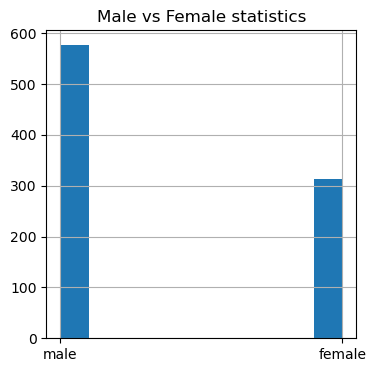

In [13]:
plt.figure(figsize=(4, 4))
df['Sex'].hist()
plt.title('Male vs Female statistics')
plt.show()

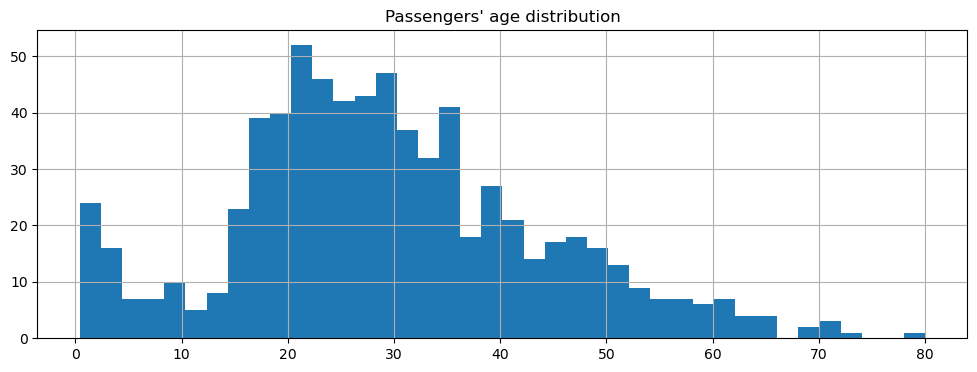

In [14]:
plt.figure(figsize=(12, 4))
df['Age'].hist(bins=40)
plt.title("Passengers' age distribution")
plt.show()

### 5. It can be any kind of data

In [15]:
file_to_load = all_files[3]
print('file to load:', file_to_load)
get_object_response = s3.get_object(
    Bucket=DEMO_BUCKET,
    Key=file_to_load
)

file to load: GSOM.jpg


In [16]:
img = get_object_response['Body']

In [17]:
img

In [18]:
from PIL import Image

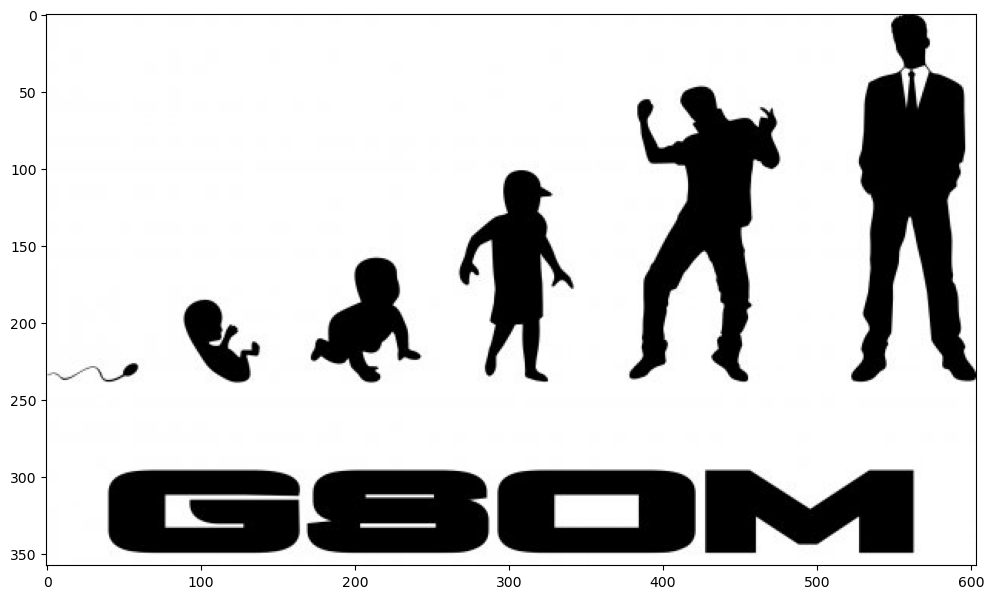

In [19]:
plt.figure(figsize=(12, 8))
img = Image.open(img)
plt.imshow(np.array(img))
plt.show()

### 6. It can be with public access

In [20]:
DEMO_BUCKET_PUB = 'miba-master-classes-public'

#### 6.1. Table data

In [21]:
df = pd.read_csv(
    f'https://storage.yandexcloud.net/{DEMO_BUCKET_PUB}/vgsales.csv'
)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


#### 6.2. Images

Public acceess bucket image can be inserted into html or markdown code:

In [23]:
![Public Image](https://storage.yandexcloud.net/miba-master-classes-public/picture_pub.jpg)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[Public Image](https://storage.yandexcloud.net/miba-master-classes-public/picture_pub.jpg)'


Or can be accessed through url https://storage.yandexcloud.net/miba-master-classes-public/picture_pub.jpg

### 7. Using s3fs-supported pandas API

Pandas can read [directly from object storage](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) with some parameters added!

In [24]:
file_to_load = all_files[1]
print(f's3://storage.yandexcloud.net/{DEMO_BUCKET}/{file_to_load}')
df = pd.read_csv(
    f's3a://{DEMO_BUCKET}/{file_to_load}',
    storage_options={
        'key': creds['aws_access_key_id'],
        'secret': creds['aws_secret_access_key'],
        'client_kwargs': {'endpoint_url': 'https://storage.yandexcloud.net'}
    }
)

df.head()

s3://storage.yandexcloud.net/miba-master-classes/Enterprener/master_classes_24/my_file/Feodosy.txt


ParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 4


## <font color='red'>LAB WORK #2</font>

Your home assignment for this part is:
1. Take any file you want (not very large size)
2. Upload it to S3 bucket
3. Check if file is in S3 storage

__HINT:__ use [this manual](https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-uploading-files.html)

In [25]:
### YOUR CODE HERE ###

In [34]:
bucket_name = creds['bucket_name']
file_name = 'Heart_Disease_Prediction.csv'

s3.upload_file(file_name, bucket_name, file_name)
print('File uploaded:', file_name)

response = s3.list_objects(Bucket=bucket_name)

if 'Contents' in response:
    files = [file['Key'] for file in response['Contents']]
    print('Files in bucket:', files)

    if file_name in files:
        print('Upload verified!')
    else:
        print('File not found.')
else:
    print('No files in bucket.')

File uploaded: Heart_Disease_Prediction.csv
Files in bucket: ['Alena_Lab2.txt', 'Enterprener/master_classes_24/my_file/Feodosy.txt', 'Feodosy.txt', 'GSOM.jpg', 'Heart_Disease_Prediction.csv', 'ilia.txt', 'lab2_Kate.txt', 'pic_Dasha.jpeg', 'picture.jpg', 'sasha.txt', 'titanic.csv']
Upload verified!
